In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import re
import requests  # for API calls
import time


In [19]:
# Load the dataset
data = pd.read_csv('Data_202425.csv')

# Convert date columns to datetime
data['ico_start'] = pd.to_datetime(data['ico_start'], errors='coerce')
data['ico_end'] = pd.to_datetime(data['ico_end'], errors='coerce')

# Display the first few rows of the dataset
data.head()


C:\Users\luish\AppData\Local\Temp\ipykernel_15484\1106459662.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['ico_end'] = pd.to_datetime(data['ico_end'], errors='coerce')


,country,ico_start,ico_end,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,...,pre_ico_end,pre_ico_price_usd,accepting,link_white_paper,linkedin_link,github_link,website,rating,teamsize,ERC20
0,India,2020-10-08,2020-12-31,0.01,Y,0.5,1.00E+08,500000000.0,Yes,1.0,...,NaN,5.00E-03,"BTC, ETH, and Fiat currency",NaN,https://www.linkedin.com/company/bitfinex-limi...,NaN,NaN,4.0,NaN,1.0
1,Cyprus,2020-01-08,2020-12-31,0.1,N,0.6,NaN,84000000.0,No,1.0,...,31/10/2019,NaN,"ETH, BTC",https://www.tycoon.io/whitepaper.pdf,https://www.linkedin.com/company/tycoonio/about/,https://www.github.com/tycoon?tab=repositories,https://www.tycoon.io?utm_source=icobench,4.8,14.0,1.0
2,UK,2019-01-03,2020-12-31,0.14,Y,0.5,NaN,75000000.0,No,0.0,...,15/01/2019,NaN,"ETH, BTC, LTC",https://mindsync.ai/docs/whitepaper.pdf,https://www.linkedin.com/company/mindsync/,NaN,NaN,4.5,14.0,1.0
3,UK,NaT,2021-01-31,0.1,N,0.5,NaN,500000000.0,Yes,1.0,...,NaN,0.1,"BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS",https://cdn.pointpay.io/WhitePaper__en.pdf?cac...,https://www.linkedin.com/company/pointpay/about/,NaN,NaN,4.7,43.0,1.0
4,Seychelles,NaT,NaT,0.06,N,0.4,NaN,400000000.0,Yes,1.0,...,NaN,0.03,ETH,https://lohncontrol.com/down/LOHN-white-paper-...,https://www.linkedin.com/showcase/lohncontrol,https://www.github.com/lohn7?tab=repositories,https://lohncontrol.com?utm_source=icobench,4.4,16.0,1.0


C:\Users\luish\AppData\Local\Temp\ipykernel_15484\1945686915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='success', palette='Set2')


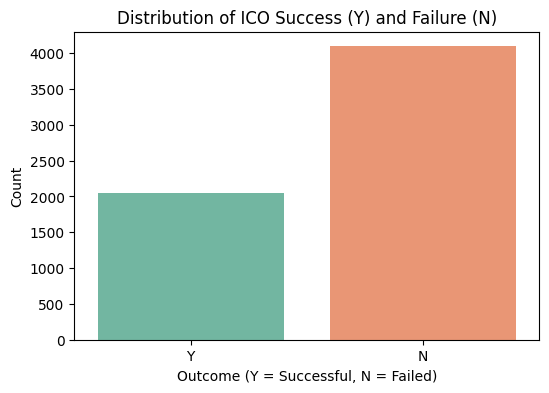

In [20]:
# Plot the distribution of the "Outcome of the ICO"
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='success', palette='Set2')
plt.title('Distribution of ICO Success (Y) and Failure (N)')
plt.xlabel('Outcome (Y = Successful, N = Failed)')
plt.ylabel('Count')
plt.show()


In [21]:
# Filter non-numeric values from price_usd column
def is_numeric(x):
    try:
        float(x)
        return False
    except:
        return True

# Get unique non-numeric values
non_numeric_prices = data['price_usd'][data['price_usd'].astype(str).apply(is_numeric)].unique()

print("Unique non-numeric price formats:")
for price in non_numeric_prices:
    print(f"- {price}")

Unique non-numeric price formats:
- 1 KBX = 0.00011 ETH
- 1 TPLAY = 0.0012 ETH
- 1 DGO = 0.0004705882 ETH
- 1 HIX = 0.01 EUR
- 1 KIMERA = 0.00036 ETH
- 1 RLZ = 0.0002 ETH
- 1 BILL = 1 XLM
- 1 TRE = 0.0001 ETH
- 1 BATT = 0.000033 ETH
- 1 CCR = 0.0002 ETH
- 1 InBit = 0.01 EUR
- 1 TRU = 0.0008888889 ETH
- 1 ICX = 400 STG
- 1 AXT = 0.00025 ETH
- 1 JPT = 0.4 EUR
- 1 SYM = 0.00023697 ETH
- 1 MARA = 0.134 EUR
- 1 SPRING = 0.00002 ETH
- 1 BHM = 0.5 EUR
- 1 MDR = 0.0004 ETH
- 1 SQUID = 0.15 GBP
- 1 RENC = 0.001 ETH
- 1 BLOCK = 0.0001 ETH
- 1 BOOK = 0.1 EUR
- 1 TMED = 0.0000125 ETH
- 1 TBE = 0.000125 ETH
- 1 URP = 0.025 EUR
- 1 NAME = 0.00005 ETH
- 1 ABT Token = 0.000333 ETH
- 1 ARIA = 0.000035 BTC
- 1 GRD = 0.00005 ETH
- 1 MONI = 1 ETH
- 1 TTR = 0.0006666667 ETH
- 1 XSR = 0.0002 ETH
- 1 AMEC = 0.00025 ETH
- 1 ATLS = 0.0001 ETH
- 1 BSSX = 0.0001 ETH
- 1 mHLX = 0.02 EUR
- 1 jNetCoin = 0.0001 BTC
- 1 CATER = 0.0001470588 ETH
- 1 SPL = 0.01 ETH
- 1 Kibble/KIBL = 1.05 ETH
- 1 VTY = 0.00007 ETH
- 1 B

In [22]:
# Filter non-numeric values from price_usd column
def is_numeric(x):
    try:
        float(x)
        return False
    except:
        return True

# Get unique non-numeric values
non_numeric_prices = data['min_investment'][data['min_investment'].astype(str).apply(is_numeric)].unique()

print("Unique non-numeric price formats:")
for price in non_numeric_prices:
    print(f"- {price}")

Unique non-numeric price formats:
- 50 USD
- 100 USD
- 0.10 USD
- 1 ETH
- 100 HASH
- 10 EUR
- 1 USD
- 0.1 ETH
- 100 EUR
- 0.01 ETH
- 0.5 ETH
- 0.02 ETH
- 500 BFC
- 500 BNR
- 1000 USD
- 1,000 USD
- 7 ETH
- 0.25 ETH
- 1,000 PLS
- 10 USD
- 150 EUR
- 0.223 ETH
- 5,000 USD
- 1 NEO
- 300 ICX
- 200 SWG
- 0.0025 ETH
- 100 YON
- 0.2 ETH
- 0.15 ETH
- 25 ETH
- 200 USD
- 500 USD
- 5 USD
- 30 BXM
- 0.05 ETH
- 15 CONM
- 10 Deed
- 150 USD
- 0.20 ETH
- 50 EUR
- 30,000 VET
- 1,000 REG
- 0.4ETH
- 0,1 ETH
- 100 UGT
- 60 USD
- 250 USD
- 100,000 USD
- 50 BMK
- 10.000 USD
- 20 USD
- 10,000 USD
- 500 HALA
- 100 ICOIN
- 20,000 USD
- 300 USD
- 60 EUR
- 100 DOMI
- presale: 1,000 USD / crowdsale: 100 USD
- 15 EUR
- 30,000 USD
- 1,000 MERO
- 0.001 ETH
- 500 $
- 5000 USD
- 0.3 ETH
- 100 CRN
- 5 ETH
- none
- 300 EUR
- 80 USDT
- 0.1 BTC
- 5 GBR
- 2 ETH
- 1,000 ZAZA
- 0.03 ETH
- 20 HRBE
- 0.47 ETH
- 500 ZNC
- 30 USD
- 100 BCCN
- 0.04 ETH
- 25 USD
- 15 USD
- 1 DEO = 0.5 USD
- 1 Neo
- 3,000 EUR
- 300 ETH
- 0.0001 GIFT


In [23]:
def parse_price(price_str):
    """
    Parse a price string and return (value, currency).
    Returns (None, None) if parsing fails.
    """
    if pd.isnull(price_str):
        return None, None
    
    # Clean up the string
    price_str = price_str.strip()
    
    # If the format is like "1 TOKEN = 0.15 GBP", we take the right side.
    if '=' in price_str:
        parts = price_str.split('=')
        price_str = parts[-1].strip()
    
    # Regex to match a number (including scientific notation) and an optional currency code
    match = re.search(r'([0-9\.Ee+-]+)\s*([A-Za-z]+)?', price_str)
    if match:
        try:
            value = float(match.group(1))
        except ValueError:
            value = None
        # If no currency is found, assume USD (or decide based on context)
        currency = match.group(2).upper() if match.group(2) else 'USD'
        return value, currency
    else:
        return None, None

# Example:
example_prices = [
    "0.01", "3.91E-02", "NA", "1", 
    "1 SQUID = 0.15 GBP", "1 RENC = 0.001 ETH", "1 BLOCK = 0.0001 ETH"
]
for p in example_prices:
    print(p, "->", parse_price(p))


0.01 -> (0.01, 'USD')
3.91E-02 -> (0.0391, 'USD')
NA -> (None, None)
1 -> (1.0, 'USD')
1 SQUID = 0.15 GBP -> (0.15, 'GBP')
1 RENC = 0.001 ETH -> (0.001, 'ETH')
1 BLOCK = 0.0001 ETH -> (0.0001, 'ETH')


In [25]:
def get_exchange_rate(currency, date):
    """
    Get the exchange rate for the given currency to USD on the given date.
    For fiat currencies, you might use an API such as ExchangeRatesAPI.
    For cryptocurrencies, consider using CoinGecko's API.
    This dummy function returns fixed rates for demonstration.
    """
    # Dummy exchange rates (you must update these with real historical data)
    conversion_rates = {
        'USD': 1.0,
        'GBP': 1.3,  # Example: 1 GBP = 1.3 USD
        'EUR': 1.1,  # Example: 1 EUR = 1.1 USD
        'ETH': 400.0,  # Example: 1 ETH = 400 USD
        # Add other currencies/tokens as needed
    }
    
    # For an unknown currency, return None (or handle as needed)
    return conversion_rates.get(currency, None)

# Example usage:
rate = get_exchange_rate('GBP', datetime(2020, 1, 1))
print("Exchange rate for GBP on 2020-01-01:", rate)


Exchange rate for GBP on 2020-01-01: 1.3


In [ ]:
def get_crypto_rate_cc(crypto: str, date: datetime) -> float:
    """
    Get historical price of a cryptocurrency in USD using CryptoCompare API.
    
    Parameters:
        crypto (str): Cryptocurrency symbol, e.g., 'ETH'.
        date (datetime): Date for which to get the historical price.
        
    Returns:
        float: Price in USD or None if data is unavailable.
    """
    # Convert the date to a Unix timestamp (in seconds)
    timestamp = int(date.timestamp())
    
    # Construct the API URL
    url = f"https://min-api.cryptocompare.com/data/pricehistorical"
    params = {
        'fsym': crypto.upper(),  # from symbol, e.g., ETH
        'tsyms': 'USD',          # target currency: USD
        'ts': timestamp          # historical timestamp
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raises an error for bad responses
        data = response.json()
        # Expected data format: { "ETH": { "USD": 400.0 } }
        return data.get(crypto.upper(), {}).get('USD', None)
    except Exception as e:
        print(f"Error retrieving data for {crypto} on {date.strftime('%Y-%m-%d')}: {e}")
        return None

# Example usage:
example_date = datetime(2025, 2, 17)
rate = get_crypto_rate_cc('USD', example_date)
print(f"Historical rate for ETH on {example_date.strftime('%Y-%m-%d')}: {rate} USD")

Historical rate for ETH on 2025-02-17: 1 USD


In [39]:
cleaned_data = data.copy()
# Apply the parse_price function and create separate columns for price and currency
cleaned_data[['price_value', 'price_currency']] = pd.DataFrame(
    cleaned_data['price_usd'].apply(parse_price).tolist(), 
    index=cleaned_data.index
)

# Verify the results
print("Sample of parsed prices:")
print(cleaned_data[['price_usd', 'price_value', 'price_currency']].head())

# Check for any remaining unparsed values
print("\nUnique currencies found:")
print(cleaned_data['price_currency'].unique())

print("\nCount of null values:")
print(cleaned_data['price_value'].isnull().sum())

Sample of parsed prices:
  price_usd  price_value price_currency
0      0.01         0.01            USD
1       0.1         0.10            USD
2      0.14         0.14            USD
3       0.1         0.10            USD
4      0.06         0.06            USD

Unique currencies found:
['USD' None 'ETH' 'EUR' 'XLM' 'STG' 'GBP' 'BTC' 'XEM' 'MDX' 'COM' 'X'
 'WPAW' 'AUD' 'BTS' 'KRW' 'TRX' 'TTC' 'SGD' 'BLGC' 'BTCM' 'MLT' 'IZAC'
 'WAVE']

Count of null values:
487


In [41]:
# Apply the parse_price function and create separate columns for price and currency
cleaned_data[['min_investment_value', 'min_investment_currency']] = pd.DataFrame(
    cleaned_data['min_investment'].apply(parse_price).tolist(), 
    index=cleaned_data.index
)

# Verify the results
print("Sample of parsed min investment:")
print(cleaned_data[['min_investment', 'min_investment_value', 'min_investment_currency']].head())

# Check for any remaining unparsed values
print("\nUnique currencies found:")
print(cleaned_data['min_investment_currency'].unique())

print("\nCount of null values:")
print(cleaned_data['min_investment_value'].isnull().sum())

Sample of parsed min investment:
  min_investment  min_investment_value min_investment_currency
0         50 USD                  50.0                     USD
1            NaN                   NaN                    None
2        100 USD                 100.0                     USD
3       0.10 USD                   0.1                     USD
4          1 ETH                   1.0                     ETH

Unique currencies found:
['USD' None 'ETH' 'HASH' 'EUR' 'BFC' 'BNR' 'NEO' 'ICX' 'SWG' 'YON' 'BXM'
 'CONM' 'DEED' 'TH' 'UGT' 'BMK' 'HALA' 'ICOIN' 'DOMI' 'SALE' 'CRN' 'USDT'
 'BTC' 'GBR' 'HRBE' 'ZNC' 'BCCN' 'GIFT' 'OKO' 'IRB' 'OVT' 'QC' 'VOL' 'ICO'
 'DVX' 'TOKENS' 'NIX' 'AMI' 'SPTC' 'YRC' 'BOX' 'BEX' 'PMC' 'FLIP' 'SPAN'
 'BTT' 'AET' 'P' 'INX' 'CCX' 'RF' 'MEGAX' 'QTCT' 'SIX' 'PTI' 'UBT' 'CHF'
 'INFLR' 'KVT' 'SAIEX' 'SRXIO' 'SWI' 'FLEX' 'UCBI' 'VRF' 'VTUUR' 'BTML'
 'BQT' 'ENTRY' 'ACM' 'MAP' 'SCOP' 'SKYFT' 'TEAM' 'ZSC' 'ALC' 'BOSE' 'CRES'
 'ERE' 'ETA' 'FSC' 'XGN' 'SPON' 'MBC' 'MUU' 'GAS

In [47]:
def convert_to_usd(row, date_col='ico_start'):
    """
    Convert price value to USD based on currency and date
    
    Parameters:
        row: DataFrame row containing price value and currency
        date_col: Column name containing the date
    Returns:
        float: Price in USD
    """
    if pd.isna(row['price_value']) or pd.isna(row[date_col]):
        return None
        
    # If already in USD, return the value
    if row['price_currency'] == 'USD':
        print(f"currency is USD")
        return row['price_value']
        
    # Convert date string to datetime if needed
    if isinstance(row[date_col], str):
        try:
            date = pd.to_datetime(row[date_col])
        except:
            return None
    else:
        date = row[date_col]
    
    # Add rate limiting to avoid API throttling
    time.sleep(0.5)  # 100ms delay between requests

    # Get conversion rate
    rate = get_crypto_rate_cc(row['price_currency'], date)
    
    if rate is not None:
        return row['price_value'] * rate
    return None

# Apply conversion to both price and minimum investment columns
cleaned_data['price_usd_converted'] = cleaned_data.apply(
    lambda row: convert_to_usd(row), axis=1
)

cleaned_data['min_investment_usd_converted'] = cleaned_data.apply(
    lambda row: convert_to_usd(
        pd.Series({
            'price_value': row['min_investment_value'],
            'price_currency': row['min_investment_currency'],
            'ico_start': row['ico_start']
        })
    ), 
    axis=1
)

# Display results
print("Sample of converted prices:")
print(cleaned_data[[
    'price_usd', 'price_value', 'price_currency', 'price_usd_converted',
    'min_investment', 'min_investment_value', 'min_investment_currency', 'min_investment_usd_converted'
]].head(50))

# Check conversion statistics
print("\nConversion statistics:")
print("Price USD conversion success rate: {:.2f}%".format(
    100 * cleaned_data['price_usd_converted'].notna().mean()
))
print("Min investment conversion success rate: {:.2f}%".format(
    100 * cleaned_data['min_investment_usd_converted'].notna().mean()
))

currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency is USD
currency

In [45]:
# Check for any problematic conversions
print("\nRows with failed price conversions:")
failed_conversions = cleaned_data[
    pd.isna(cleaned_data['price_usd_converted']) & 
    pd.notna(cleaned_data['price_value'])
]
print(failed_conversions[['price_usd', 'price_value', 'price_currency', 'ico_start']].head())


Rows with failed price conversions:
   price_usd  price_value price_currency ico_start
3        0.1     0.100000            USD       NaT
4       0.06     0.060000            USD       NaT
5       0.12     0.120000            USD       NaT
7   3.91E-02     0.039100            USD       NaT
12  2.892896     2.892896            USD       NaT


In [ ]:
# Select numerical columns
numerical_columns = ['price_usd', 'min_investment', 'sold_tokens', 'token_for_sale', 'distributed_in_ico', 'rating', 'teamsize']

# Calculate correlation matrix
correlation_matrix = cleaned_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

UnboundLocalError: cannot access local variable 'value' where it is not associated with a value

In [7]:
# Select numerical columns
numerical_columns = ['price_usd', 'min_investment', 'sold_tokens', 'token_for_sale', 'distributed_in_ico', 'rating', 'teamsize']

# Calculate correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


ValueError: could not convert string to float: '1 KBX = 0.00011 ETH'